Total Acceleration=Gravity+User Acceleration

The dataset contains various columns, but we'll focus on Acceleration_x, Acceleration_y, and Acceleration_z for this analysis.

Next, let's proceed with the calculations:

Velocity: We'll integrate the acceleration data to obtain velocity. For the integration, we'll need to know the time interval between each data point. Could you please provide this information?

Position: After getting the velocity, we'll integrate again to obtain the position.

Energy: Kinetic energy is given by 
�
�
=
1
2
�
�
2
KE= 
2
1
​
 mv 
2
 , where 
�
m is mass and 
�
v is the velocity. If we assume a constant mass, we can compute the kinetic energy for each data point based on the calculated velocity.

Dominant Frequencies: We'll perform a Fast Fourier Transform (FFT) on the acceleration data to find the dominant frequencies.

Could you please provide the time interval between each data sample?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz
from scipy.fftpack import fft


In [43]:
#nested for loop
for i, axis in enumerate(['x', 'y', 'z']):
    for j in range(4):
        print('Row '+str(i),'Axis '+axis,'Col(Acc, Vel, Pos, Freq) '+str(j))

Row 0 Axis x Col(Acc, Vel, Pos, Freq) 0
Row 0 Axis x Col(Acc, Vel, Pos, Freq) 1
Row 0 Axis x Col(Acc, Vel, Pos, Freq) 2
Row 0 Axis x Col(Acc, Vel, Pos, Freq) 3
Row 1 Axis y Col(Acc, Vel, Pos, Freq) 0
Row 1 Axis y Col(Acc, Vel, Pos, Freq) 1
Row 1 Axis y Col(Acc, Vel, Pos, Freq) 2
Row 1 Axis y Col(Acc, Vel, Pos, Freq) 3
Row 2 Axis z Col(Acc, Vel, Pos, Freq) 0
Row 2 Axis z Col(Acc, Vel, Pos, Freq) 1
Row 2 Axis z Col(Acc, Vel, Pos, Freq) 2
Row 2 Axis z Col(Acc, Vel, Pos, Freq) 3


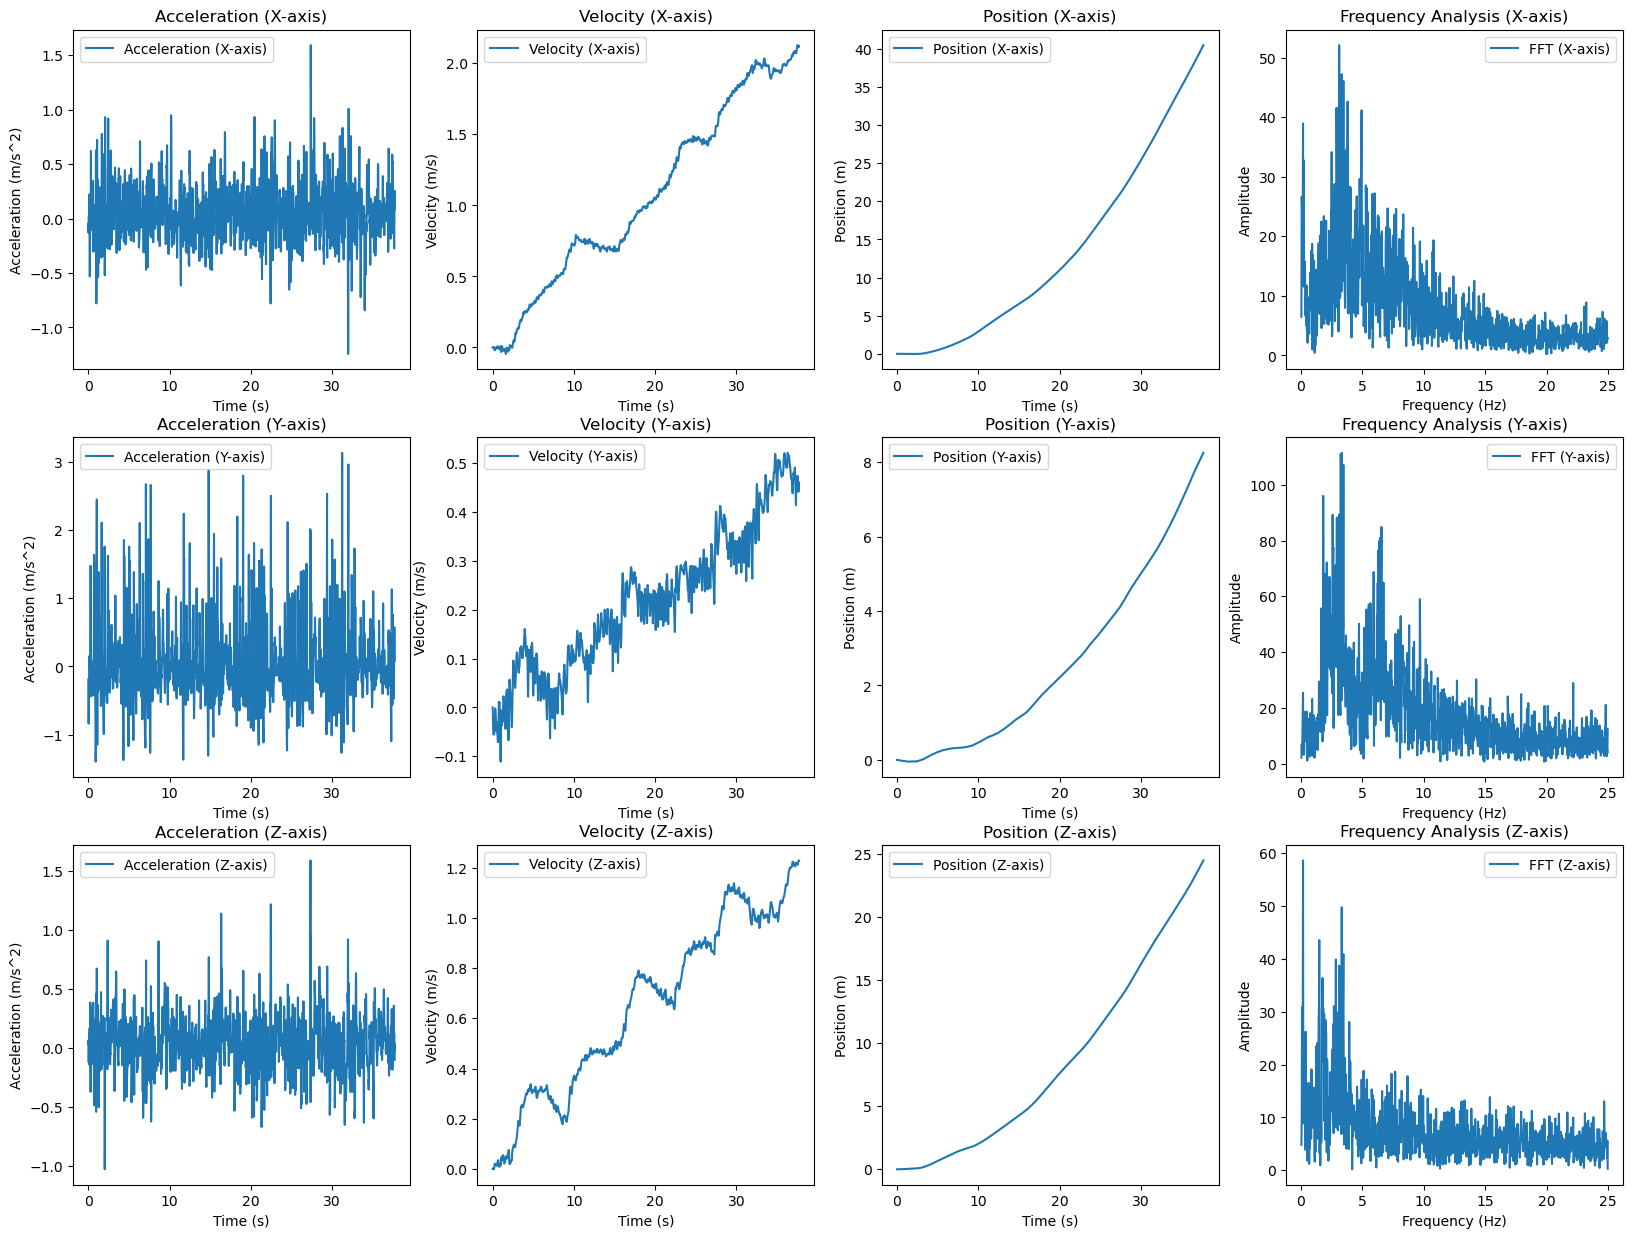

In [29]:

def plot_movement(file_path, sample_rate=50):
    df = pd.read_csv('./Motion/'+file_path)
    time = np.linspace(0, len(df)/sample_rate, len(df))

    fig, axs = plt.subplots(3, 4, figsize=(20, 15))  # 3 rows for x, y, z axes and 4 columns for the four graphs
    
    for i, axis in enumerate(['x', 'y', 'z']):
        acceleration = df[f'userAcceleration.{axis}']
        velocity = cumtrapz(acceleration, dx=1/sample_rate, initial=0)
        position = cumtrapz(velocity, dx=1/sample_rate, initial=0)
        sp = np.fft.fft(acceleration)
        freq = np.fft.fftfreq(len(sp), 1 / sample_rate)
        
        data = [acceleration, velocity, position, sp]  # List of data for the four graphs
        titles = ['Acceleration', 'Velocity', 'Position', 'Frequency Analysis']
        ylabels = ['Acceleration (m/s^2)', 'Velocity (m/s)', 'Position (m)', 'Amplitude']
        
        for j in range(4):
            ax = axs[i, j]
            if j < 3:  # For Acceleration, Velocity, and Position
                ax.plot(time, data[j], label=f'{titles[j]} ({axis.upper()}-axis)')
                ax.set_xlabel('Time (s)')
            else:  # For Frequency Analysis
                ax.plot(freq[freq > 0], np.abs(data[j][freq > 0]), label=f'FFT ({axis.upper()}-axis)')
                ax.set_xlabel('Frequency (Hz)')
            ax.set_title(f'{titles[j]} ({axis.upper()}-axis)')
            ax.set_ylabel(ylabels[j])
            ax.legend()
    
    #plt.tight_layout()
    plt.show()

# Run the function on the dataset
plot_movement('dws_1/sub_7.csv')

## Seeing huge drifts 
Sum Gravity + userAcceleration
Apply High pass filter

In [21]:
df = pd.read_csv('./Motion/dws_1/sub_1.csv')
df
file_path = 'jog_16/sub_7.csv'
df['label'] = file_path[:3]
df

,Unnamed: 0,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,label
0,0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,jog
1,1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,jog
2,2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,jog
3,3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,jog
4,4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,jog
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746,1746,1.797120,-0.562324,2.445889,0.824443,0.533154,0.189844,-0.123211,0.909536,-0.379757,-0.268367,0.006733,-0.064874,jog
1747,1747,1.814297,-0.569719,2.449655,0.817212,0.539396,0.203020,-0.057641,0.723118,-0.437812,-0.102444,-0.060666,-0.229738,jog
1748,1748,1.830821,-0.578367,2.447967,0.809207,0.546658,0.215288,0.343238,0.997236,-0.338155,-0.085590,-0.030209,-0.087740,jog
1749,1749,1.849557,-0.586962,2.439458,0.800485,0.553834,0.229110,0.470144,1.227937,-0.332223,-0.048105,0.029555,0.060441,jog


In [25]:
import numpy as np
from scipy.signal import butter, filtfilt

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y



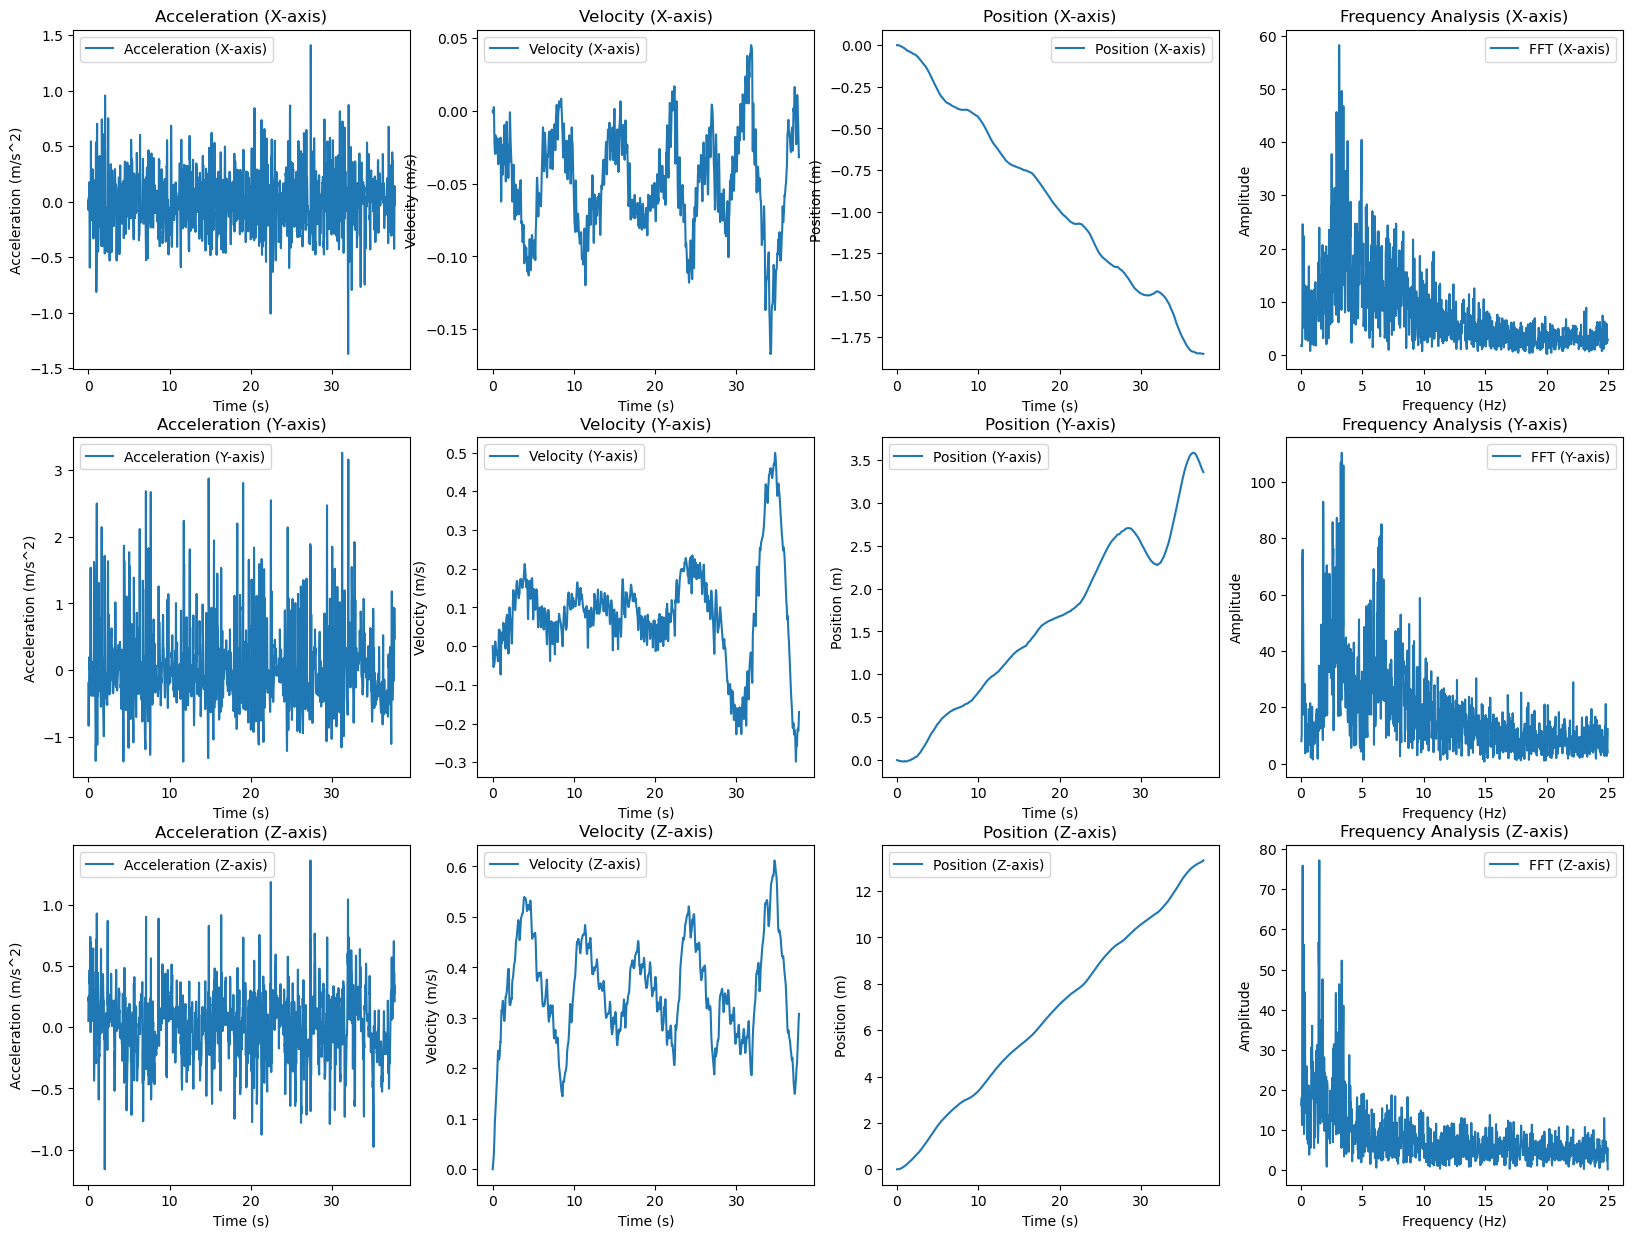

In [30]:

def plot_movement_grav(file_path, sample_rate=50):
    df = pd.read_csv('./Motion/'+file_path)
    df['label'] = file_path[:3]
    time = np.linspace(0, len(df)/sample_rate, len(df))

    fig, axs = plt.subplots(3, 4, figsize=(20, 15))  # 3 rows for x, y, z axes and 4 columns for the four graphs
    
    for i, axis in enumerate(['x', 'y', 'z']):
        df[f'Acceleration.{axis}'] = df[f'gravity.{axis}']+df[f'userAcceleration.{axis}']
        # acceleration = df[f'Acceleration.{axis}']
        acceleration = highpass_filter(df[f'Acceleration.{axis}'], cutoff=0.1, fs=50)
        velocity = cumtrapz(acceleration, dx=1/sample_rate, initial=0)
        position = cumtrapz(velocity, dx=1/sample_rate, initial=0)
        sp = np.fft.fft(acceleration)
        freq = np.fft.fftfreq(len(sp), 1 / sample_rate)
        
        data = [acceleration, velocity, position, sp]  # List of data for the four graphs
        titles = ['Acceleration', 'Velocity', 'Position', 'Frequency Analysis']
        ylabels = ['Acceleration (m/s^2)', 'Velocity (m/s)', 'Position (m)', 'Amplitude']
        
        for j in range(4):
            ax = axs[i, j]
            if j < 3:  # For Acceleration, Velocity, and Position
                ax.plot(time, data[j], label=f'{titles[j]} ({axis.upper()}-axis)')
                ax.set_xlabel('Time (s)')
            else:  # For Frequency Analysis
                ax.plot(freq[freq > 0], np.abs(data[j][freq > 0]), label=f'FFT ({axis.upper()}-axis)')
                ax.set_xlabel('Frequency (Hz)')
            ax.set_title(f'{titles[j]} ({axis.upper()}-axis)')
            ax.set_ylabel(ylabels[j])
            ax.legend()
    
    #plt.tight_layout()
    plt.show()

# Run the function on the dataset
plot_movement_grav('dws_1/sub_7.csv')

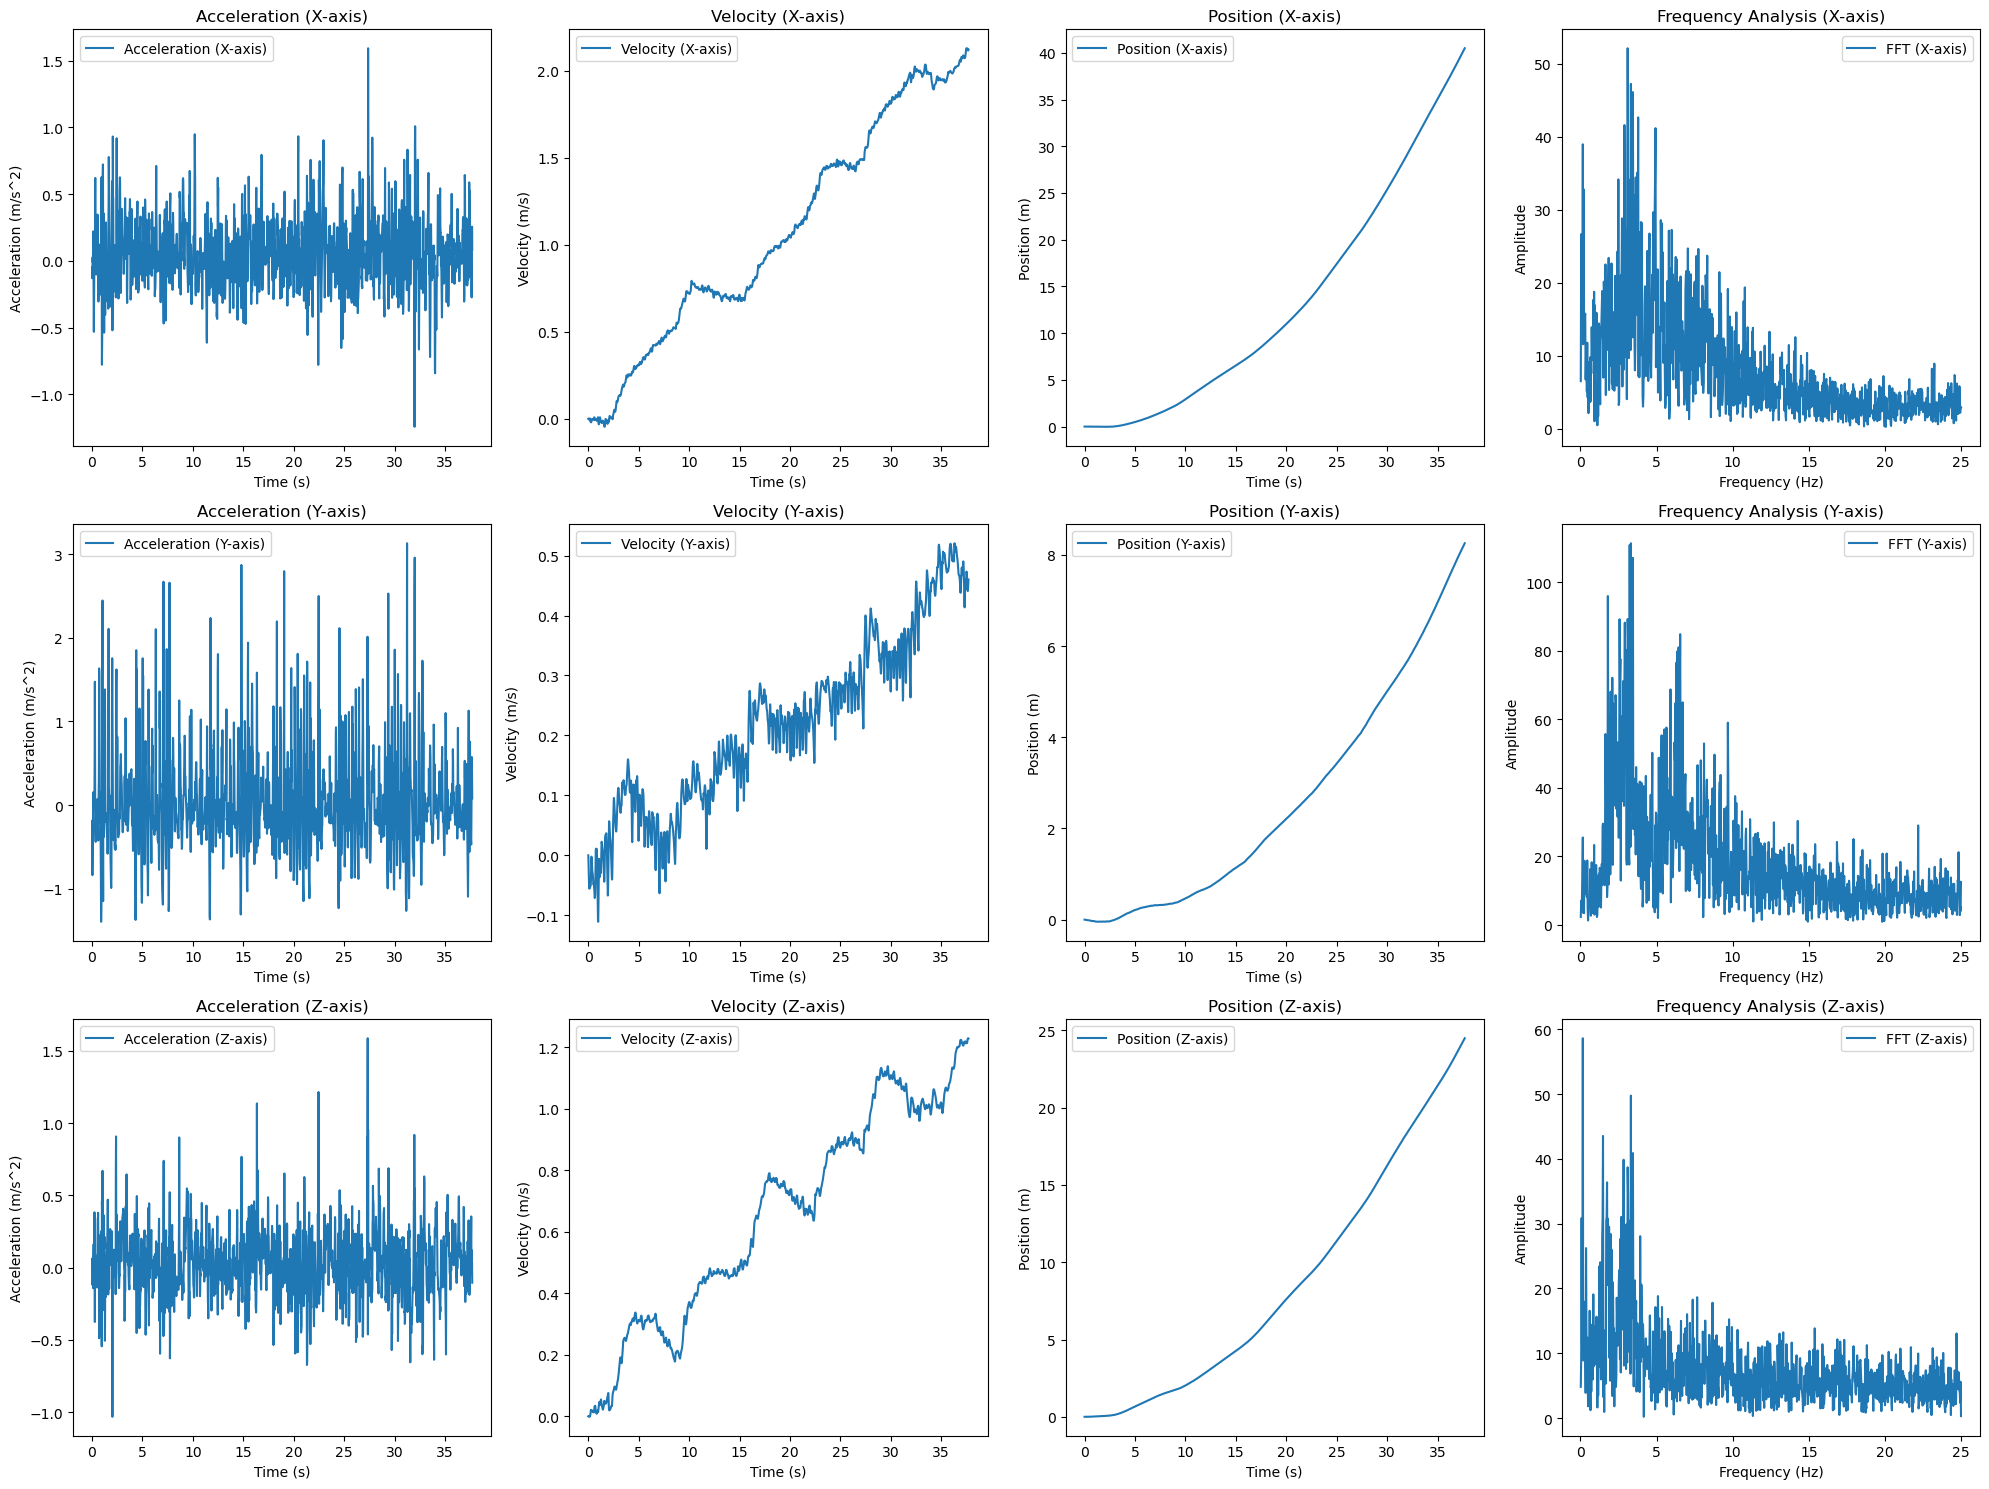

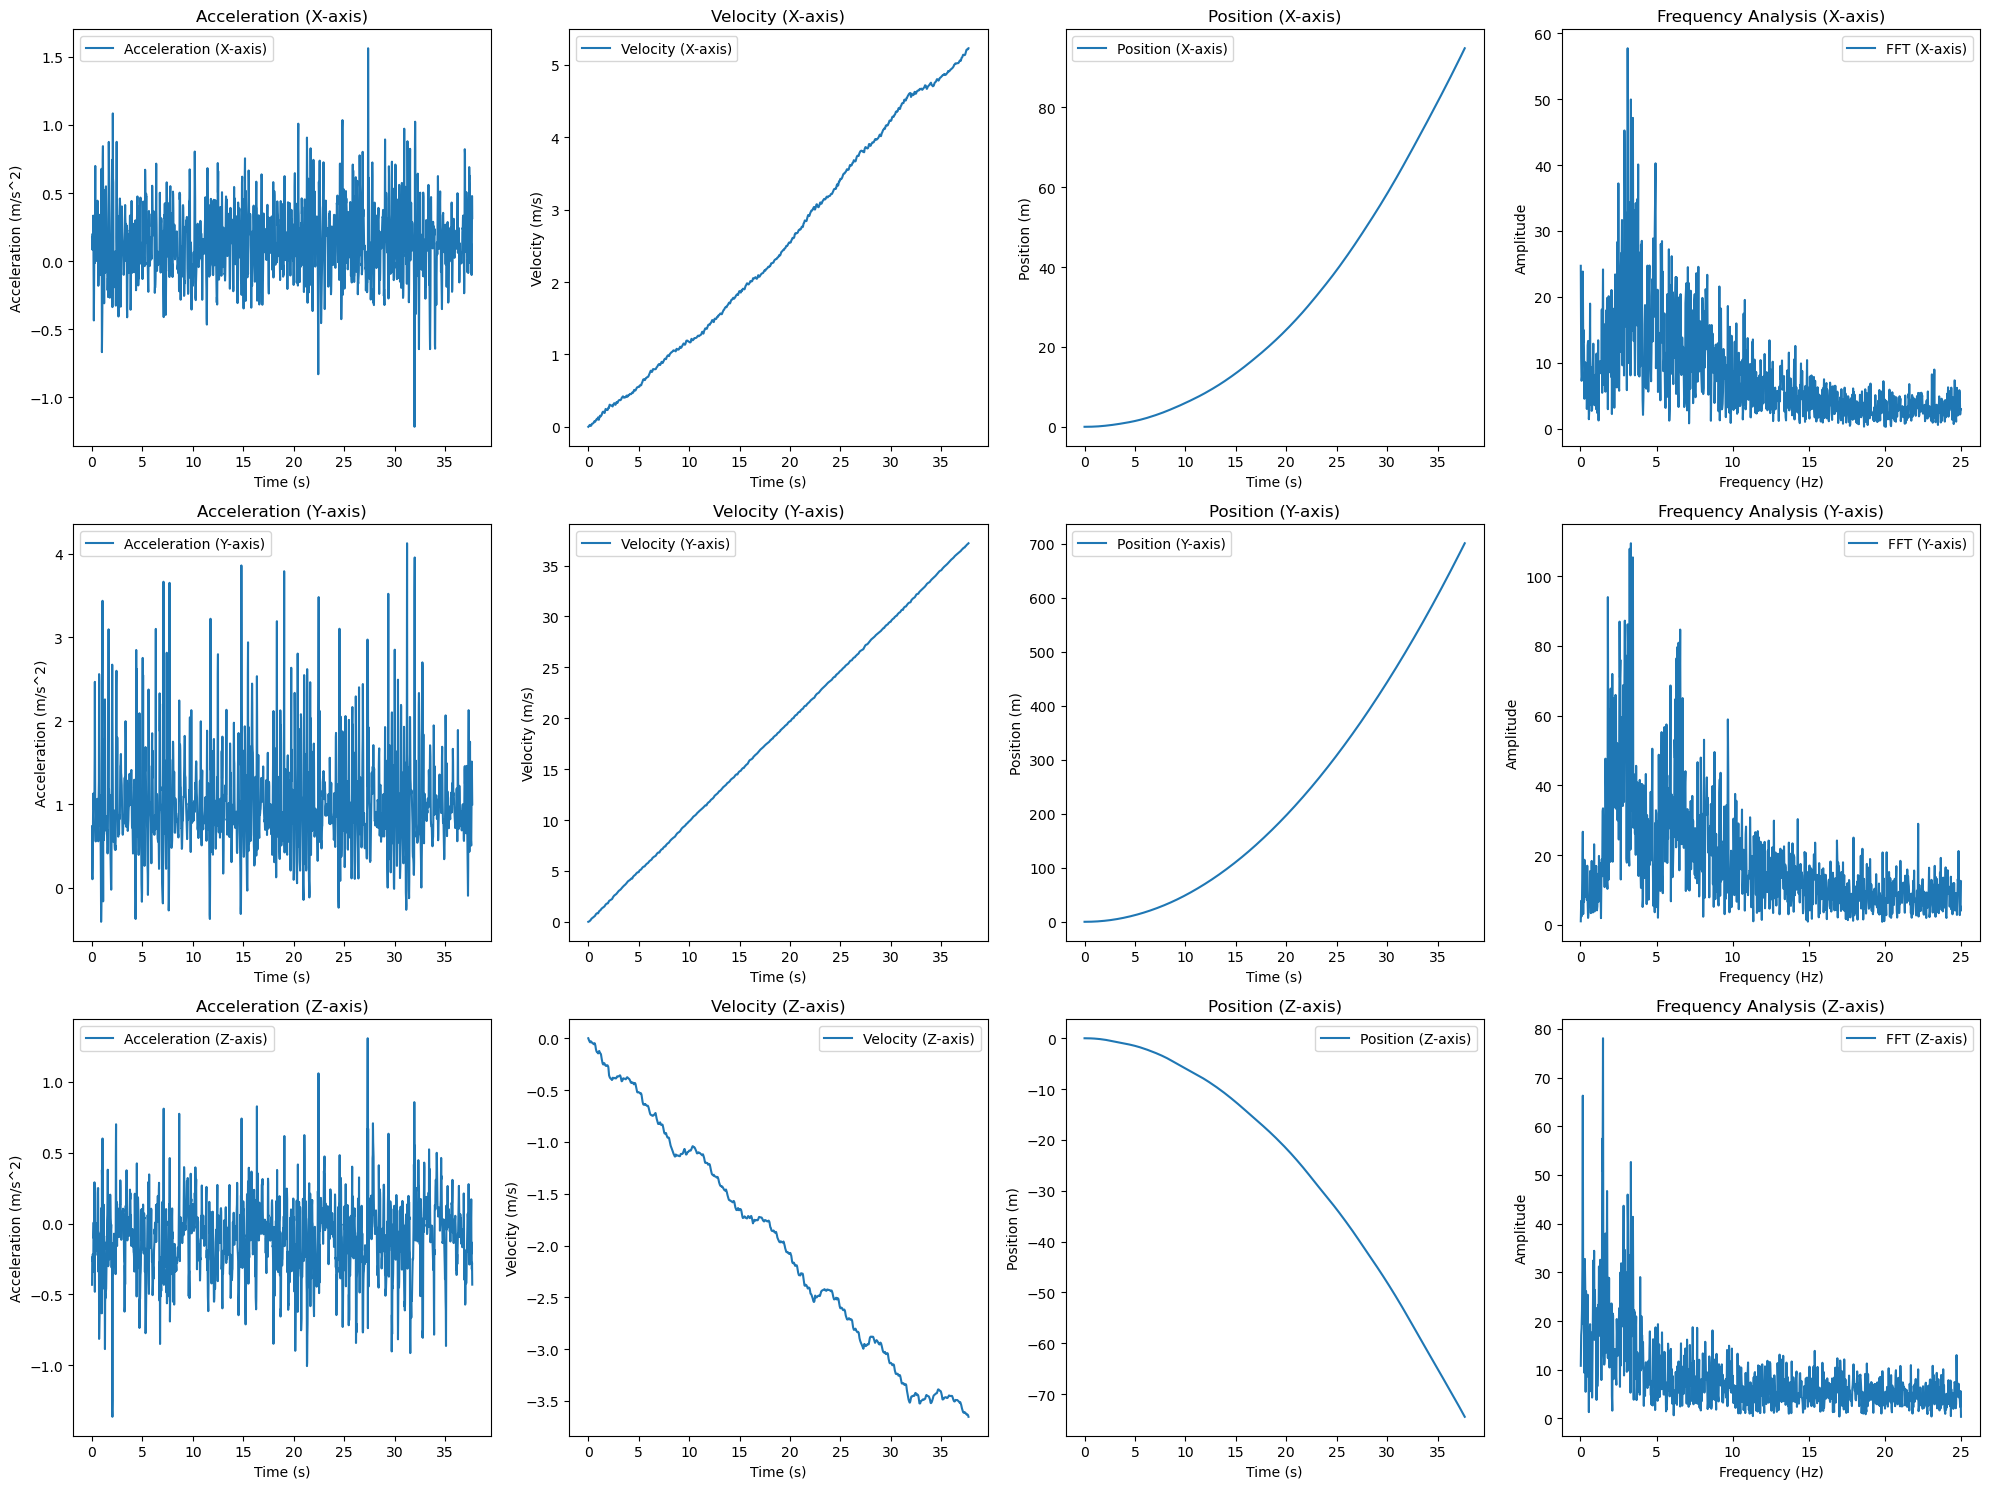

In [18]:
plot_movement('dws_1/sub_7.csv')

plot_movement_grav('dws_1/sub_7.csv')

x 0 0
x 0 1
x 0 2
x 0 3
y 1 0
y 1 1
y 1 2
y 1 3
z 2 0
z 2 1
z 2 2
z 2 3
